# Survey Analysis

In [ ]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import scipy.stats as stats
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [2]:
# Load Data
df = pd.read_csv('C:/Users/ricar/Desktop/Data/data_survey.csv', sep=';')

In [3]:
df.shape

(50, 37)

In [4]:
df = df[df['lfdn'] != 88] # ID 88 has too many missing values -> excluded from analysis

### Data Preparation

In [5]:
# Add ID column
df['ID'] = range(1, len(df) + 1)

In [6]:
# Reverse answers of negatively worded items  
def reverse_values(value):
    # Replace 1 with 7, 2 with 6, 3 with 5, etc.
    return 8 - value

# Technical Affinity 05: It is enough for me that a technical system works; I don’t care how or why.
df['att_ai_05_reversed'] = df['att_ai_05'].apply(reverse_values)

# Attitude towards AI 06: I think Artificial Intelligence is dangerous.
df['att_ai_06_reversed'] = df['att_ai_06'].apply(reverse_values)

# Attitude towards AI 04: Organizations use Artificial Intelligence unethically.
df['tech_aff_04_reversed'] = df['tech_aff_04'].apply(reverse_values)

# print(df[['tech_aff_04_reversed', 'tech_aff_04']])

### Data Exploration & Descriptive Statistics

#### Explainability

In [7]:
# Explainability
# Explanation 1: why_local
print(df["why_local"].median())
print(df["why_local"].std())
print(df["why_local"].min())
print(df["why_local"].max())
exp1_counts = df["why_local"].value_counts()
exp1_counts

6.0
1.5714285714285714
2
7


why_local
6    19
7    10
3     8
5     6
4     3
2     3
Name: count, dtype: int64

In [8]:
# Explanation 2: why_not_local
print(df["why_not_local"].median())
print(df["why_not_local"].std())
print(df["why_not_local"].min())
print(df["why_not_local"].max())
exp2_counts = df["why_not_local"].value_counts()
exp2_counts

6.0
1.1848677414065463
2
7


why_not_local
6    23
7    10
5     9
3     3
4     3
2     1
Name: count, dtype: int64

In [9]:
# Explanation 3: how_local
print(df["how_local"].median())
print(df["how_local"].std())
print(df["how_local"].min())
print(df["how_local"].max())
exp3_counts = df["how_local"].value_counts()
exp3_counts

2.0
1.5616579363625318
1
7


how_local
2    13
1    12
3    10
4     8
6     3
5     2
7     1
Name: count, dtype: int64

In [10]:
# Explanation 4: what_else_local
print(df["what_else_local"].median())
print(df["what_else_local"].std())
print(df["what_else_local"].min())
print(df["what_else_local"].max())
exp4_counts = df["what_else_local"].value_counts()
exp4_counts

5.0
1.5230652944494738
2
7


what_else_local
6    13
5    12
4     7
7     6
3     6
2     5
Name: count, dtype: int64

In [11]:
# Explanation 5: why_global
print(df["why_global"].median())
print(df["why_global"].std())
print(df["why_global"].min())
print(df["why_global"].max())
exp5_counts = df["why_global"].value_counts()
exp5_counts

6.0
0.7704137946363541
4
7


why_global
6    26
5    11
7    10
4     2
Name: count, dtype: int64

In [12]:
# Explanation 6: how_global
print(df["how_global"].median())
print(df["how_global"].std())
print(df["how_global"].min())
print(df["how_global"].max())
exp6_counts = df["how_global"].value_counts()
exp6_counts

4.0
1.516631157542008
1
7


how_global
2    14
5    12
3     9
4     7
6     5
7     1
1     1
Name: count, dtype: int64

In [13]:
# Explanation 7: why_not_global
print(df["why_not_global"].median())
print(df["why_not_global"].std())
print(df["why_not_global"].min())
print(df["why_not_global"].max())
exp7_counts = df["why_not_global"].value_counts()
exp7_counts

6.0
0.8660254037844386
3
7


why_not_global
6    20
5    18
7     9
4     1
3     1
Name: count, dtype: int64

In [14]:
# Explanation 8: how_to_global
print(df["how_to_global"].median())
print(df["how_to_global"].std())
print(df["how_to_global"].min())
print(df["how_to_global"].max())
exp8_counts = df["how_to_global"].value_counts()
exp8_counts

5.0
1.5883825684240775
1
7


how_to_global
5    13
6    10
4     8
3     6
7     6
2     5
1     1
Name: count, dtype: int64

In [15]:
# Explanation 9: what_if_global
print(df["what_if_global"].median())
print(df["what_if_global"].std())
print(df["what_if_global"].min())
print(df["what_if_global"].max())
exp9_counts = df["what_if_global"].value_counts()
exp9_counts

5.0
1.5073515991756585
1
7


what_if_global
6    19
5    10
4     7
3     7
2     2
1     2
7     2
Name: count, dtype: int64

### Demographic Variables

#### Gender

gender
1    28
2    21
Name: count, dtype: int64


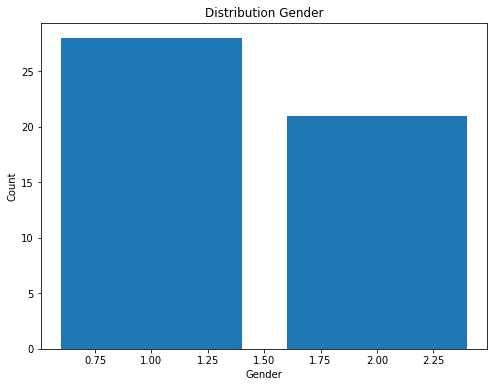

In [16]:
# Gender
gender_counts = df["gender"].value_counts()
print(gender_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution Gender")
plt.show()

#### Age

age
2    23
3    16
4     8
6     1
5     1
Name: count, dtype: int64


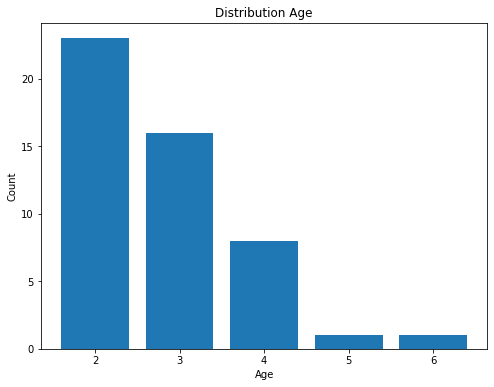

In [17]:
# Age
age_counts = df["age"].value_counts()
print(age_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution Age")
plt.show()

#### Education

education
4    29
3    13
5     5
2     2
Name: count, dtype: int64


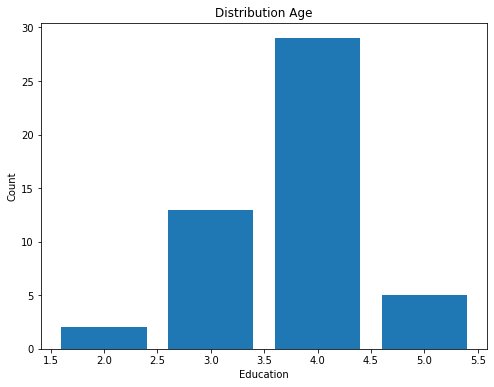

In [18]:
# Education
educ_counts = df["education"].value_counts()
print(educ_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(educ_counts.index, educ_counts.values)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Distribution Age")
plt.show()

### Control Variables

#### Technical Affinity

12
28


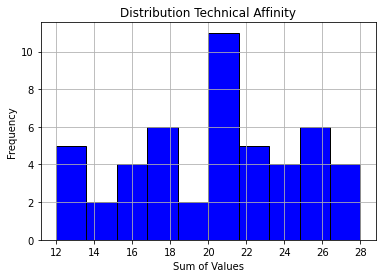

In [19]:
# Technical Affinity
# Create Technical Affinity Index --> Sum
# Sum of: [tech_aff_01	tech_aff_02	tech_aff_03	tech_aff_04] 
df['Sum_TechAff'] = df[['tech_aff_01', 'tech_aff_02', 'tech_aff_03', 'tech_aff_04_reversed']].sum(axis=1)

print(df['Sum_TechAff'].min())
print(df['Sum_TechAff'].max())

#Plot Distribution
plt.hist(df['Sum_TechAff'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Sum of Values')
plt.ylabel('Frequency')
plt.title('Distribution Technical Affinity')
plt.grid(True)
plt.show()

In [20]:
# Technical Affinity
# Cronbach's Alpha Technical Affinity
pg.cronbach_alpha(data=df[['tech_aff_01', 'tech_aff_02', 'tech_aff_03', 'tech_aff_04_reversed']])

(0.8391082933415519, array([0.75 , 0.902]))

In [21]:
# Mean + SD per Person
# Mean per person
df['tech_mean'] = df[['tech_aff_01', 'tech_aff_02', 'tech_aff_03', 'tech_aff_04_reversed']].mean(axis=1)

# SD per person
df['tech_SD'] = df[['tech_aff_01', 'tech_aff_02', 'tech_aff_03', 'tech_aff_04_reversed']].std(axis=1)

#print(df[['tech_mean', 'tech_SD']])

# Overall Mean + SD
# Overall Mean
overall_mean_tech = df['tech_mean'].mean()
print(overall_mean_tech)

# Overall SD
overall_SD_tech = df['tech_SD'].std()
print(overall_SD_tech)

5.061224489795919
0.526794287686489


In [22]:
# Create index -> take care of missing values
index_values = ['tech_aff_01', 'tech_aff_02', 'tech_aff_03', 'tech_aff_04_reversed']

# If the original value is 0, replace the total with the number of non-zero values
result_series = df[index_values].apply(lambda col: np.sum(col) / col[col != 0].count() if 0 in col.values else np.mean(col), axis=1)

# Ergebnis als DataFrame mit dem gewünschten Index erstellen
df['tech_index'] = pd.DataFrame(result_series, columns=['Mean_Value'], index=df.index)

In [23]:
# One sample t-test Technical Affinity
tech_mean = 4

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(df['tech_index'], tech_mean)

# Mean differences
mean_diff = [i - tech_mean for i in df['tech_index']]

# Pooled std_dev
pooled_std_dev = np.std(mean_diff, ddof=1)

# Calculate mean of the mean differences
mean_mean_diff = np.mean(mean_diff)

# Calculate Cohen's d
d = mean_mean_diff / pooled_std_dev

print(f"One-sample t-test result: t({len(df) - 1}) = {t_stat:.2f}, p = {p_value:.3f}")
print(f"Cohen's d: {d:.2f}")

# Check statisticall significance of the result, at a given alpha level
alpha = 0.001
if p_value < alpha:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

One-sample t-test result: t(48) = 6.93, p = 0.000
Cohen's d: 0.99
The result is statistically significant.


In [24]:
# Corrleation Analysis: Technical Affinity
# Spearman's Rank Correlation: Technical Affinity - Gender
correlation_aff_gen, p_value_aff_gen = stats.spearmanr(df[['tech_index', 'gender']])
print("Spearman's Rank Correlation Technical Affinity - Gender:", correlation_aff_gen)
print("p-Value aff_gen:", p_value_aff_gen)
if p_value_aff_gen < 0.001:
    signifikanzniveau = "***"
elif p_value_aff_gen < 0.01:
    signifikanzniveau = "**"
elif p_value_aff_gen < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Technical Affinity - Gender: -0.5187293455995006
p-Value aff_gen: 0.00013430260509834558
Signifikanzniveau: ***


In [25]:
# Spearman's Rank Correlation: Technical Affinity - Age
correlation_aff_age, p_value_aff_age = stats.spearmanr(df[['tech_index', 'age']])
print("Spearman's Rank Correlation Technical Affinity - Age:", correlation_aff_age)
print("p-Value aff_age:", p_value_aff_age)
if p_value_aff_age < 0.001:
    signifikanzniveau = "***"
elif p_value_aff_age < 0.01:
    signifikanzniveau = "**"
elif p_value_aff_age < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Technical Affinity - Age: 0.22226186185434021
p-Value aff_age: 0.1247987509046401
Signifikanzniveau: n.s.


In [26]:
# Spearman's Rank Correlation: Technical Affinity - Education
correlation_aff_edu, p_value_aff_edu = stats.spearmanr(df[['tech_index', 'education']])
print("Spearman's Rank Correlation Technical Affinity - Education:", correlation_aff_edu)
print("p-Value aff_edu:", p_value_aff_edu)
if p_value_aff_edu < 0.001:
    signifikanzniveau = "***"
elif p_value_aff_edu < 0.01:
    signifikanzniveau = "**"
elif p_value_aff_edu < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Technical Affinity - Education: 0.3147151314176317
p-Value aff_edu: 0.02763469808509239
Signifikanzniveau: *


#### Attitude towards AI

21
35


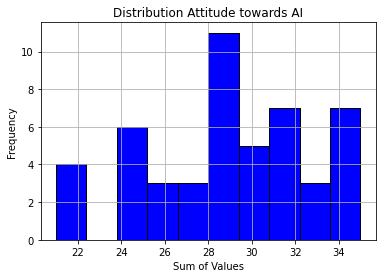

In [27]:
# Attitude towards AI
# Create Attitude towards AI Index --> Sum
# Sum of: [att_ai_01	att_ai_02	att_ai_03	att_ai_04	att_ai_05	att_ai_06]
df['Sum_Att'] = df[['att_ai_01', 'att_ai_02', 'att_ai_03', 'att_ai_04', 'att_ai_05_reversed', 'att_ai_06_reversed']].sum(axis=1)


print(df['Sum_Att'].min()) # Min: 21
print(df['Sum_Att'].max()) # Max: 35

#Plot Distribution
plt.hist(df['Sum_Att'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Sum of Values')
plt.ylabel('Frequency')
plt.title('Distribution Attitude towards AI')
plt.grid(True)
plt.show()

In [28]:
# Cronbach's Alpha Attitude towards AI
pg.cronbach_alpha(data=df[['att_ai_01', 'att_ai_02', 'att_ai_03', 'att_ai_04', 'att_ai_05_reversed', 'att_ai_06_reversed']])
# Cronbachs alpha of 0.35 too low -> Explorative Factor Analysis to see which items cause the low cronbachs alpha

(0.5397425489968689, array([0.307, 0.714]))

In [29]:
# EFA - Factor Analysis
data = df[['att_ai_01', 'att_ai_02', 'att_ai_03', 'att_ai_04', 'att_ai_05_reversed', 'att_ai_06_reversed']]

# Bartlett's test statistic to check whether the data are suitable for factor analysis
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f"Chi-Square Value: {chi_square_value}")
print(f"P-Value: {p_value}")

# Initialize the factor analysis object
fa = FactorAnalyzer(n_factors=1, rotation=None)  # Set the number of factors to 1

# Carry out the factor analysis
fa.fit(data)

# Extract the factor loadings
factor_loadings = fa.loadings_

# The factor loadings show how strongly each item correlates with the identified factor
print("Faktorladungen:")
print(factor_loadings)

## The different signs suggest that the first four items and the last two items probably represent different concepts or dimensions and do not share the same latent factor. 

Chi-Square Value: 109.17852556677494
P-Value: 2.3181536229757956e-16
Faktorladungen:
[[-0.73976122]
 [-0.82578797]
 [-0.78322844]
 [-0.70403136]
 [ 0.32417858]
 [ 0.11192035]]


In [30]:
# Cronbach's Alpha Attitude towards AI: Items 1-4, excluding 5 & 6
pg.cronbach_alpha(data=df[['att_ai_01', 'att_ai_02', 'att_ai_03', 'att_ai_04']])
# Now acceptable value of 0.84 -> exclusion of items att_ai_05 & att_ai_06 in the further analysis

(0.8393412764665706, array([0.751, 0.902]))

In [31]:
# Attitude towards AI (without last two items)
# Mean + SD per Person
# mean per person
df['att_mean'] = df[['att_ai_01', 'att_ai_02', 'att_ai_03', 'att_ai_04']].mean(axis=1)

# sd per person
df['att_SD'] = df[['att_ai_01', 'att_ai_02', 'att_ai_03', 'att_ai_04']].std(axis=1)

# Overall Mean + SD
# Overall mean
overall_mean_att = df['att_mean'].mean()
print(overall_mean_att)

# Overall SD
overall_SD_att = df['att_SD'].std()
print(overall_SD_att)


5.6479591836734695
0.3921559330717591


In [33]:
# create index
df['att_index'] = df[['att_ai_01', 'att_ai_02', 'att_ai_03', 'att_ai_04']].mean(axis=1)

In [34]:
# One smaple t-test: Attitude towards AI
att_mean = 4

# Perform the one-sample t-test
t_stat, p_value = stats.ttest_1samp(df['att_mean'], att_mean)

# Mean differences
mean_diff = [i - att_mean for i in df['att_mean']]

# Pooled std_dev
pooled_std_dev = np.std(mean_diff, ddof=1)

# Calculate the mean of the mean differences
mean_mean_diff = np.mean(mean_diff)

# Calculate Cohen's d
d = mean_mean_diff / pooled_std_dev

print(f"One-sample t-test result: t({len(df) - 1}) = {t_stat:.2f}, p = {p_value:.3f}")
print(f"Cohen's d: {d:.2f}")

# Check statisticall significance of the result, at a given alpha level
alpha = 0.001
if p_value < alpha:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

One-sample t-test result: t(48) = 13.78, p = 0.000
Cohen's d: 1.97
The result is statistically significant.


In [35]:
# Correlation Analysis: Attitude towards AI
# Spearman's Rank Correlation: Attitude towards AI - Gender
correlation_att_gen, p_value_att_gen = stats.spearmanr(df[['att_index', 'gender']])
print("Spearman's Rank Correlation Attitude - Gender:", correlation_att_gen)
print("p-Value att_gen:", p_value_att_gen)
if p_value_att_gen < 0.001:
    signifikanzniveau = "***"
elif p_value_att_gen < 0.01:
    signifikanzniveau = "**"
elif p_value_att_gen < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Attitude - Gender: -0.43017589652212246
p-Value att_gen: 0.002035112714304464
Signifikanzniveau: **


In [36]:
# Spearman's Rank Correlation: Attitude towards AI - Age
correlation_att_age, p_value_att_age = stats.spearmanr(df[['att_index', 'age']])
print("Spearman's Rank Correlation Attitude - Age:", correlation_att_age)
print("p-Value att_age:", p_value_att_age)
if p_value_att_age < 0.001:
    signifikanzniveau = "***"
elif p_value_att_age < 0.01:
    signifikanzniveau = "**"
elif p_value_att_age < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Attitude - Age: 0.12403555136795746
p-Value att_age: 0.39581414584171704
Signifikanzniveau: n.s.


In [37]:
# Spearman's Rank Correlation: Attitude towards AI - Education
correlation_att_edu, p_value_att_edu = stats.spearmanr(df[['att_index', 'education']])
print("Spearman's Rank Correlation Attitude - Education:", correlation_att_edu)
print("p-Value att_edu:", p_value_att_edu)
if p_value_att_edu < 0.001:
    signifikanzniveau = "***"
elif p_value_att_edu < 0.01:
    signifikanzniveau = "**"
elif p_value_att_edu < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Attitude - Education: 0.3707421388364729
p-Value att_edu: 0.008731766655450526
Signifikanzniveau: **


#### AI Expertise

In [39]:
# AI Expertise
# Create AI Expertise Index --> Sum
# Sum of: ['use_apply_ai_01', 'use_apply_ai_02', 'know_un_ai_01', 'know_un_ai_02', 'know_un_ai_03', 'know_un_ai_04','detect_ai_01', 'detect_ai_02', 'ethics_ai_01', 'ethics_ai_02', 'create_ai_01', 'create_ai_02']
df['expertise'] = df[['use_apply_ai_01', 'use_apply_ai_02', 'know_un_ai_01', 'know_un_ai_02', 'know_un_ai_03', 'know_un_ai_04','detect_ai_01', 'detect_ai_02', 'ethics_ai_01', 'ethics_ai_02', 'create_ai_01', 'create_ai_02']].sum(axis=1)

print(df['expertise'].min())
print(df['expertise'].max())

29
74


4.469387755102041
0.36017077066263475


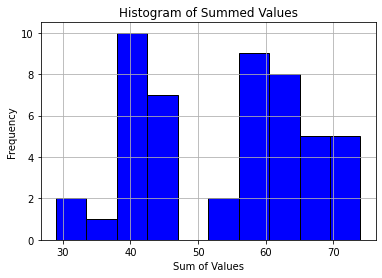

In [40]:
# mean per person
df['exp_mean'] = df[['use_apply_ai_01', 'use_apply_ai_02', 'know_un_ai_01', 'know_un_ai_02', 'know_un_ai_03', 'know_un_ai_04','detect_ai_01', 'detect_ai_02', 'ethics_ai_01', 'ethics_ai_02', 'create_ai_01', 'create_ai_02']].mean(axis=1)

# sd per person
df['exp_SD'] = df[['use_apply_ai_01', 'use_apply_ai_02', 'know_un_ai_01', 'know_un_ai_02', 'know_un_ai_03', 'know_un_ai_04','detect_ai_01', 'detect_ai_02', 'ethics_ai_01', 'ethics_ai_02', 'create_ai_01', 'create_ai_02']].std(axis=1)

# Overall mean
overall_mean_exp = df['exp_mean'].mean()
print(overall_mean_exp)

# Overall SD
overall_SD_exp = df['exp_SD'].std()
print(overall_SD_exp)

plt.hist(df['expertise'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Sum of Values')
plt.ylabel('Frequency')
plt.title('Histogram of Summed Values')
plt.grid(True)
plt.show()

In [41]:
# Create index -> take care of missing values
index_values = ['use_apply_ai_01', 'use_apply_ai_02', 'know_un_ai_01', 'know_un_ai_02', 'know_un_ai_03', 'know_un_ai_04','detect_ai_01', 'detect_ai_02', 'ethics_ai_01', 'ethics_ai_02', 'create_ai_01', 'create_ai_02']

# If the original value is 0, replace the total with the number of non-zero values
result_series = df[index_values].apply(lambda col: np.sum(col) / col[col != 0].count() if 0 in col.values else np.mean(col), axis=1)

# Ergebnis als DataFrame mit dem gewünschten Index erstellen
df['exp_index'] = pd.DataFrame(result_series, columns=['Mean_Value'], index=df.index)
df['exp_index'] = df['exp_index'].round(2)

In [42]:
#AI Expertise: all
pg.cronbach_alpha(data=df[['use_apply_ai_01', 'use_apply_ai_02', 'know_un_ai_01', 'know_un_ai_02', 'know_un_ai_03', 'know_un_ai_04', 'detect_ai_01', 'detect_ai_02', 'ethics_ai_01', 'ethics_ai_02', 'create_ai_01', 'create_ai_02']])

(0.9037041881048044, array([0.859, 0.939]))

In [43]:
# One sample t-test attitude towards AI
exp_mean = 4

# Perform the one-sample t-test
t_stat, p_value = stats.ttest_1samp(df['exp_index'], exp_mean)

# Mean differences
mean_diff = [i - exp_mean for i in df['exp_index']]

# Pooled std-dev
pooled_std_dev = np.std(mean_diff, ddof=1)

# Calculate the mean of the mean differences
mean_mean_diff = np.mean(mean_diff)

# Calculate Cohen's d
d = mean_mean_diff / pooled_std_dev

print(f"One-sample t-test result: t({len(df) - 1}) = {t_stat:.2f}, p = {p_value:.3f}")
print(f"Cohen's d: {d:.2f}")

# Check statisticall significance of the result, at a given alpha level
alpha = 0.05
if p_value < alpha:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

One-sample t-test result: t(48) = 3.19, p = 0.002
Cohen's d: 0.46
The result is statistically significant.


In [44]:
# Correlation Analysis: AI Expertise
# Spearman's Rank Correlation: AI Expertise - Gender
correlation_exp_gen, p_value_exp_gen = stats.spearmanr(df[['exp_index', 'gender']])
print("Spearman's Rank Correlation Expertise - Gender:", correlation_exp_gen)
print("p-Value exp_gen:", p_value_exp_gen)
if p_value_exp_gen < 0.001:
    signifikanzniveau = "***"
elif p_value_exp_gen < 0.01:
    signifikanzniveau = "**"
elif p_value_exp_gen < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Expertise - Gender: -0.4685297698216428
p-Value exp_gen: 0.0006855284387628765
Signifikanzniveau: ***


In [45]:
# Spearman's Rank Correlation: AI Expertise - Age
correlation_exp_age, p_value_exp_age = stats.spearmanr(df[['exp_index', 'age']])
print("Spearman's Rank Correlation Expertise - Age:", correlation_exp_age)
print("p-Value exp_age:", p_value_exp_age)
if p_value_exp_age < 0.001:
    signifikanzniveau = "***"
elif p_value_exp_age < 0.01:
    signifikanzniveau = "**"
elif p_value_exp_age < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Expertise - Age: 0.030083117733226604
p-Value exp_age: 0.8374221503243628
Signifikanzniveau: n.s.


In [46]:
# Spearman's Rank Correlation: AI Expertise - Education
correlation_exp_edu, p_value_exp_edu = stats.spearmanr(df[['exp_index', 'education']])
print("Spearman's Rank Correlation Expertise - Education:", correlation_exp_edu)
print("p-Value exp_edu:", p_value_exp_edu)
if p_value_exp_edu < 0.001:
    signifikanzniveau = "***"
elif p_value_exp_edu < 0.01:
    signifikanzniveau = "**"
elif p_value_exp_edu < 0.05:
    signifikanzniveau = "*"
else:
    signifikanzniveau = "n.s."

print("Signifikanzniveau:", signifikanzniveau)

Spearman's Rank Correlation Expertise - Education: 0.45799581164717834
p-Value exp_edu: 0.0009360798916745703
Signifikanzniveau: ***


## Data Analysis
### Prepare datset for multilevel analysis

In [47]:
# Create new columns for dependent variables
# XAI Scope
df['xai_scope_1'] = 'local'
df['xai_scope_2'] = 'local'
df['xai_scope_3'] = 'local'
df['xai_scope_4'] = 'local'
df['xai_scope_5'] = 'global'
df['xai_scope_6'] = 'global'
df['xai_scope_7'] = 'global'
df['xai_scope_8'] = 'global'
df['xai_scope_9'] = 'global'

# Explanation Type
df['expl_type_1'] = 'why'
df['expl_type_2'] = 'why-not'
df['expl_type_3'] = 'how'
df['expl_type_4'] = 'what-else'
df['expl_type_5'] = 'why'
df['expl_type_6'] = 'how'
df['expl_type_7'] = 'how-to'
df['expl_type_8'] = 'why-not'
df['expl_type_9'] = 'what-if'

In [48]:
# Drop lfdn column
df = df.drop("lfdn", axis=1)

In [49]:
# xai_scope
xai_scope = df.melt(id_vars=['ID'], value_vars=['xai_scope_1', 'xai_scope_2', 'xai_scope_3', 'xai_scope_4', 'xai_scope_5', 'xai_scope_6', 'xai_scope_7', 'xai_scope_8', 'xai_scope_9'], var_name='xai_scope_2', value_name='xai_scope')
xai_scope = xai_scope.drop("xai_scope_2", axis=1)
xai_scope.head(2)

,ID,xai_scope
0,1,local
1,2,local


In [50]:
# expl_type
expl_type = df.melt(id_vars=['ID'], value_vars=['expl_type_1', 'expl_type_2', 'expl_type_3', 'expl_type_4', 'expl_type_5', 'expl_type_6', 'expl_type_7', 'expl_type_8', 'expl_type_9'], var_name='expl_type_2', value_name='expl_type')
expl_type = expl_type.drop("expl_type_2", axis=1)
expl_type.head(2)

,ID,expl_type
0,1,why
1,2,why


In [51]:
# explainability
explainability = df.melt(id_vars=['ID'], value_vars=['why_local', 'why_not_local', 'how_local', 'what_else_local', 'why_global', 'how_global',	'why_not_global', 'how_to_global', 'what_if_global'], var_name='expl_rating', value_name='rating')
explainability = explainability.drop("expl_rating", axis=1)
explainability.head(2)

,ID,rating
0,1,6
1,2,6


In [52]:
df_long = pd.concat([xai_scope, expl_type, explainability], axis=1)
df_long = df_long.loc[:, ~df_long.columns.duplicated()]
#df_long.shape
#df_long.head()

In [53]:
merged_df = df_long.merge(df[['ID', 'exp_index', 'tech_index', 'att_index', 'age', 'gender', 'education', 'job_groups']], on='ID', how='left')

In [54]:
merged_df = df_long.merge(df[['ID', 'expertise', 'Sum_TechAff', 'Sum_Att', 'age', 'gender', 'education', 'job_groups']], on='ID', how='left')

In [55]:
# sort dataframe
df_sorted = merged_df.sort_values(by=['ID'])

#rename columns
df_sorted.rename(columns={'Sum_TechAff': 'techaff'}, inplace=True)
df_sorted.rename(columns={'Sum_Att': 'att'}, inplace=True)
df_sorted.head(2)

,ID,xai_scope,expl_type,rating,expertise,techaff,att,age,gender,education,job_groups
0,1,local,why,6,46,18,22,3,2,3,User
392,1,global,what-if,6,46,18,22,3,2,3,User


In [56]:
# To csv
df_sorted.to_csv('survey_data.csv', index=False)

In [57]:
# Load Data
#data = pd.read_csv('C:/Users/ricar/Desktop/Data/survey_data.csv', sep=',')